## Laboratorio 3

### Andre Marroquin Tarot- 22266

### Sergio Orellana- 221122

### Rodrigo Mansilla 22611

LINK GIT: https://github.com/mar22266/LABORATORIOS-IA.git


# Task 1 - Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de 
gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque. 
    
    R//

2. Compare y contraste técnicas de extracción de features (feature extraction)  y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

    R//

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin 
backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

    R//

# Task 2 y 2.1 Gradiente Descendiente Estocástico

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generar datos
np.random.seed(42)
x = np.linspace(-2, 2, 100)
y = 2 * x**3 - 3 * x**2 + 5 * x + 3 + np.random.normal(scale=1, size=x.shape) 

In [14]:
# Funciones para el descenso de gradiente
def polinomio(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def derivada_polinomio(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

def descenso_gradiente(x, y, tasa_aprendizaje=0.01, epocas=1000):
    coeficientes = np.random.randn(4)  # Coeficientes del polinomio de grado 3
    n = len(x)
    
    for _ in range(epocas):
        gradiente = np.array([np.sum((np.polyval(coeficientes, x) - y) * (x**i)) for i in range(4)]) / n
        coeficientes -= tasa_aprendizaje * gradiente[::-1]  # Invertimos el orden de los coeficientes
    
    return coeficientes

def descenso_gradiente_estocastico(x, y, tasa_aprendizaje=0.01, epocas=1000):
    coeficientes = np.random.randn(4)
    n = len(x)
    
    for _ in range(epocas):
        i = np.random.randint(n)
        gradiente = np.array([(np.polyval(coeficientes, x[i]) - y[i]) * (x[i]**j) for j in range(4)])
        coeficientes -= tasa_aprendizaje * gradiente[::-1]
    
    return coeficientes

def descenso_gradiente_minilote(x, y, tasa_aprendizaje=0.01, epocas=1000, tamano_lote=10):
    coeficientes = np.random.randn(4)
    n = len(x)
    
    for _ in range(epocas):
        indices = np.random.choice(n, tamano_lote, replace=False)
        gradiente = np.array([np.sum((np.polyval(coeficientes, x[indices]) - y[indices]) * (x[indices]**i)) for i in range(4)]) / tamano_lote
        coeficientes -= tasa_aprendizaje * gradiente[::-1]
    
    return coeficientes


In [15]:
# Comparación de tiempos de ejecución
tiempo_inicio = time.time()
coeficientes_gd = descenso_gradiente(x, y)
tiempo_intermedio_1 = time.time()
coeficientes_sgd = descenso_gradiente_estocastico(x, y)
tiempo_intermedio_2 = time.time()
coeficientes_mbgd = descenso_gradiente_minilote(x, y)
tiempo_final = time.time()

tiempo_gd = tiempo_intermedio_1 - tiempo_inicio
tiempo_sgd = tiempo_intermedio_2 - tiempo_intermedio_1
tiempo_mbgd = tiempo_final - tiempo_intermedio_2

In [16]:
# Evaluación del fitness
from sklearn.metrics import mean_squared_error

predicciones_gd = np.polyval(coeficientes_gd, x)
predicciones_sgd = np.polyval(coeficientes_sgd, x)
predicciones_mbgd = np.polyval(coeficientes_mbgd, x)

error_gd = mean_squared_error(y, predicciones_gd)
error_sgd = mean_squared_error(y, predicciones_sgd)
error_mbgd = mean_squared_error(y, predicciones_mbgd)

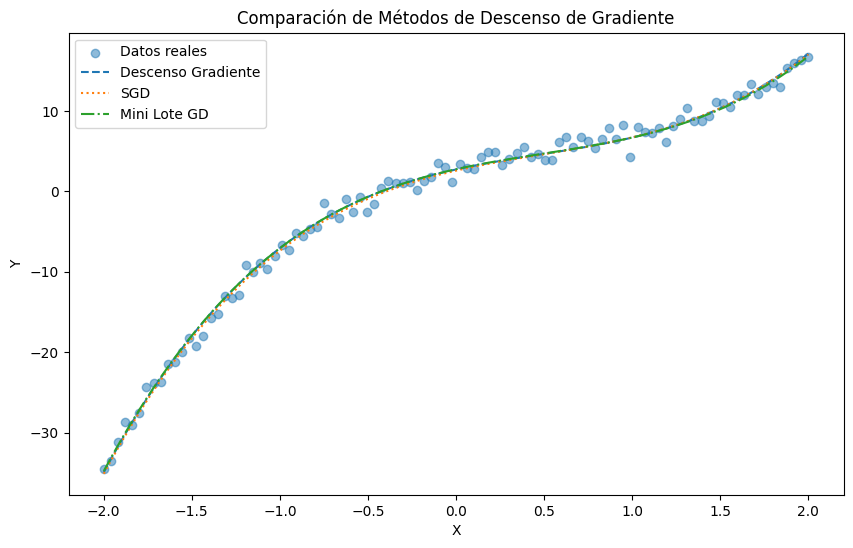

Tiempos de ejecución: GD=0.0403s, SGD=0.0207s, MiniLote GD=0.0511s
Error cuadrático medio: GD=0.8523, SGD=0.8445, MiniLote GD=0.8450


In [17]:
# Visualización de resultados
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Datos reales', alpha=0.5)
plt.plot(x, predicciones_gd, label='Descenso Gradiente', linestyle='dashed')
plt.plot(x, predicciones_sgd, label='SGD', linestyle='dotted')
plt.plot(x, predicciones_mbgd, label='Mini Lote GD', linestyle='dashdot')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparación de Métodos de Descenso de Gradiente')
plt.show()

# Resultados finales
print(f'Tiempos de ejecución: GD={tiempo_gd:.4f}s, SGD={tiempo_sgd:.4f}s, MiniLote GD={tiempo_mbgd:.4f}s')
print(f'Error cuadrático medio: GD={error_gd:.4f}, SGD={error_sgd:.4f}, MiniLote GD={error_mbgd:.4f}')


# Comparación 

## Fitness (Precisión)

- **SGD** obtuvo el menor error cuadrático medio (**MSE = 0.8445**), seguido de cerca por el **Mini Lote GD** (**MSE = 0.8450**) y finalmente por el **GD estándar** (**MSE = 0.8523**). Esto sugiere que el **SGD** fue más preciso al ajustar los parámetros del modelo en este caso.
- La ventaja del **SGD** puede deberse a su capacidad para escapar de mínimos locales mediante actualizaciones frecuentes y pequeñas basadas en muestras individuales.

## Eficiencia (Tiempo de Ejecución)

- **SGD** fue el método más rápido (**0.0207s**) debido a que realiza actualizaciones más frecuentes con menos datos por iteración.
- **GD estándar** necesitó procesar todo el conjunto de datos en cada paso, resultando en un tiempo intermedio (**0.0403s**).
- **Mini Lote GD** se encuentra entre los otros dos métodos en términos de velocidad, con un tiempo de **0.0511s**, ya que procesa lotes pequeños de datos en lugar de todo el conjunto.

## Conclusión

- **Mejor Fitness**: El **SGD** obtuvo el menor error (**MSE = 0.8445**), lo que lo hace el más preciso para este conjunto de datos.
- **Más Rápido**: El **SGD** también fue el más rápido (**0.0207s**), confirmando su ventaja en eficiencia computacional.
- **Razón**: El **SGD** realiza actualizaciones más frecuentes y enfocadas, lo que lo hace eficiente tanto en términos de tiempo como en convergencia.  
  Sin embargo, podría no ser siempre el mejor si los datos contienen mucho ruido. En este caso, funcionó bien debido a la naturaleza del problema y los datos.


# Task 2.2  Feature Selection

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Paso 1: Cargar los datos
df = pd.read_csv("high_diamond_ranked_10min.csv")

# Paso 2: Inspección del dataset
print("Estructura del dataset:")
print(df.info())
print("\nPrimeras filas del dataset:")
print(df.head())

# Paso 3: Verificación de valores nulos y duplicados
print("\nValores nulos en el dataset:")
print(df.isnull().sum().sum())
print("\nDuplicados en el dataset:")
print(df.duplicated().sum())

# Paso 4: División en variables predictoras y variable objetivo
X = df.drop(columns=["gameId", "blueWins"])
y = df["blueWins"]

# Paso 5: División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 6: Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 7: Definición de la métrica de desempeño
# Se usa la exactitud (accuracy) porque es adecuada para datasets balanceados

# Paso 8: Definición de función para hacer parameter tuning
def tune_svm(X_train, X_test, y_train, y_test):
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nMejores hiperparámetros:", grid_search.best_params_)
    return accuracy

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non

### Feature Selection

### Métrica de desempeño utilizada: Exactitud (Accuracy)
### Justificación: La exactitud es una métrica adecuada en datasets balanceados, como este caso.

In [22]:
# Método 1: Selección basada en correlación
correlation = X_train.corrwith(y_train).abs()
selected_features_corr = correlation.sort_values(ascending=False).head(10).index.tolist()
X_train_corr = X_train[selected_features_corr]
X_test_corr = X_test[selected_features_corr]
X_train_corr_scaled = scaler.fit_transform(X_train_corr)
X_test_corr_scaled = scaler.transform(X_test_corr)

corr_accuracy = tune_svm(X_train_corr_scaled, X_test_corr_scaled, y_train, y_test)


Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [23]:
# Método 2: Recursive Feature Elimination (RFE)
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

rfe_accuracy = tune_svm(X_train_rfe, X_test_rfe, y_train, y_test)


Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [24]:
# Método 3: Feature Importance con Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
selected_features_rf = feature_importances.head(10).index.tolist()
X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]
X_train_rf_scaled = scaler.fit_transform(X_train_rf)
X_test_rf_scaled = scaler.transform(X_test_rf)

rf_accuracy = tune_svm(X_train_rf_scaled, X_test_rf_scaled, y_train, y_test)


Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


### Comparación de Resultados 


Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


C:\Users\andre\AppData\Local\Temp\ipykernel_34736\4068547480.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Exactitud", y="Método", data=results_df, palette="viridis")


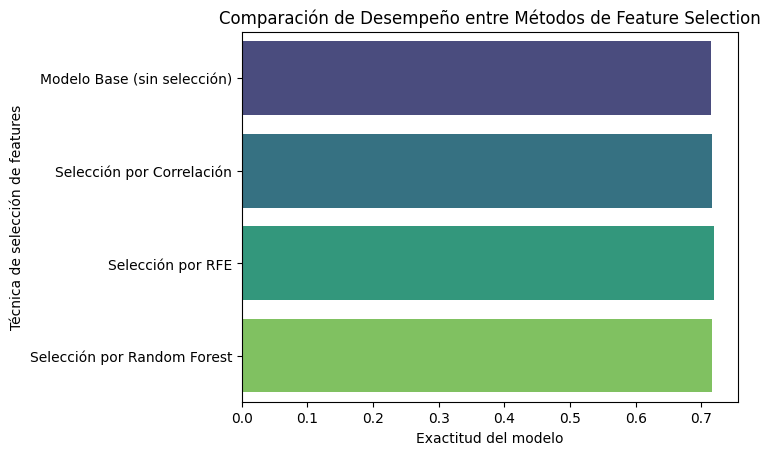

{'Modelo Base (sin selección)': 0.715080971659919, 'Selección por Correlación': 0.7165991902834008, 'Selección por RFE': 0.7196356275303644, 'Selección por Random Forest': 0.7165991902834008}


In [25]:
results = {
    "Modelo Base (sin selección)": tune_svm(X_train_scaled, X_test_scaled, y_train, y_test),
    "Selección por Correlación": corr_accuracy,
    "Selección por RFE": rfe_accuracy,
    "Selección por Random Forest": rf_accuracy
}

results_df = pd.DataFrame(results.items(), columns=["Método", "Exactitud"])
sns.barplot(x="Exactitud", y="Método", data=results_df, palette="viridis")
plt.xlabel("Exactitud del modelo")
plt.ylabel("Técnica de selección de features")
plt.title("Comparación de Desempeño entre Métodos de Feature Selection")
plt.show()
print(results)

## Conclusión

### Análisis de Resultados

De las medidas obtenidas, la **Selección por RFE** fue la mejor técnica con una exactitud de **0.7196**, superando al modelo base (**0.7151**) y a las otras técnicas de selección de características, como la Selección por Correlación y la Selección por Random Forest (**0.7166** en ambos casos).

La razón por la que **RFE** obtuvo el mejor desempeño es que elimina iterativamente las características menos relevantes, permitiendo que el modelo se entrene solo con aquellas que realmente aportan valor predictivo. Esto reduce el ruido en los datos y mejora la capacidad del modelo para generalizar. En comparación, la Selección por Correlación y la Selección por Random Forest, aunque efectivas, pueden haber retenido características menos útiles o eliminado algunas que eran importantes en combinación con otras. 

Por lo tanto, **RFE resultó ser la mejor opción en este caso, ya que optimizó el conjunto de características de manera más efectiva, mejorando la precisión del modelo SVM.**


# Task 3 Perceptrón

## Referencias: